#Learning from Data
##Learning for A Purpose
####Multi-class classification

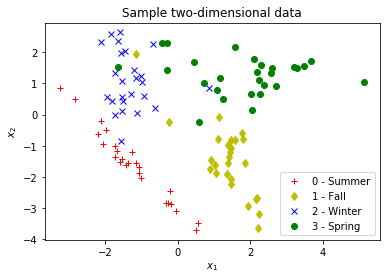

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=4,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.4, 
                           random_state=7)

fig = plt.figure()

plt.plot(X[1,0],X[1,1],'r+',label='0 - Summer')
plt.plot(X[2,1],X[2,1],'yd',label='1 - Fall')
plt.plot(X[3,1],X[3,1],'bx',label='2 - Winter')
plt.plot(X[4,1],X[4,1],'go',label='3 - Spring')

for i in range(len(y)):
  x1 = X[i,0]
  x2 = X[i,1]
  if (y[i] == 0):
    plt.plot(x1,x2,'r+')
  elif (y[i] == 1):
    plt.plot(x1,x2,'yd')
  elif (y[i] == 2):
    plt.plot(x1,x2,'bx')
  else:
    plt.plot(x1,x2,'go')    
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Sample two-dimensional data')
plt.axis('tight')
plt.savefig('ch.4.two-class.data.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.4.two-class.data.eps', dpi=350, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


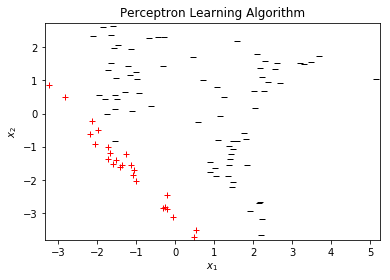

100
25
25
22
16
25
9
15
12
8
12
28
9
16
11
25
5
17
5
8
2
5
5
4
7
16
19
2
22
13
6
24
2
23
2
5
2
7
2
5
2
4
8
1
25
1
18
1
10
1
5
6
3
9
5
2
4
1
23
11
3
2
4
2
4
2
2
5
2
6
7
2
2
5
13
2
12
1
7
1
5
2
1
2
10
4
1
9
1
5
4
1
25
1
18
3
4
1
5
1
5
1
5
1
5
1
5
1
5
1
3
1
5
1
1
2
1
19
1
12
1
14
4
1
3
4
1
6
1
4
1
3
2
5
4
2
1
3
2
1
21
4
2
1
6
1
6
1
5
2
1
3
4
1
3
1
5
1
3
4
2
1
1
2
1
22
4
20
3
22
4
1
3
1
4
2
1
10
1
9
1
10
3
2
1
5
3
2
1
4
1
2
1
3
1
3
1
1
1
2
1
1
1
4
1
1
22
3
22
4
1
1
11
4
1
4
2
1
14
1
9
1
9
1
7
2
10
1
5
5
2
1
6
1
5
1
5
1
5
1
4
4
6
1
4
1
4
1
3
1
3
1
1
1
2
21
8
2
1
8
1
6
3
2
1
7
5
10
2
8
1
3
1
3
1
5
1
3
1
3
1
5
1
5
1
1
1
2
2
4
1
4
1
1
17
3
1
4
2
1
8
4
10
1
6
3
9
1
5
1
3
1
5
1
4
1
5
1
3
1
3
1
4
1
2
2
1
10
4
1
1
10
1
9
1
9
1
8
1
9
1
5
3
5
4
2
1
5
1
5
1
5
1
5
1
3
1
1
1
4
1
3
1
2
1
3
1
1
11
3
16
2
8
4
2
1
6
4
1
1
5
1
5
1
3
1
3
3
4
1
1
1
1
14
1
10
3
1
4
1
1
9
1
7
1
5
1
5
1
7
3
1
1
5
1
3
1
5
2
4
1
4
1
4
1
0


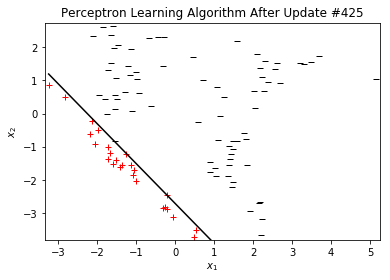

Total iterations: 425


In [ ]:
# Using PLA 

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

def pltPer(X, y, W, it=-1):
  title = "Perceptron Learning Algorithm"
  if it > 0:
    title = title + " After Update #" + str(it)
    
  f = plt.figure()
  for n in range(len(y)):
    if y[n] == 1:
      plt.plot(X[n,1],X[n,2],'k_')
    else:
      plt.plot(X[n,1],X[n,2],'r+')
  m, b = -W[1]/W[2], -W[0]/W[2]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, m*l+b, 'k-')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(X[:,2])-0.1, max(X[:,2])+0.1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title(title)
  plt.savefig('ch.4.PLA.'+str(it)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.4.PLA.'+str(it)+'.eps', dpi=350, bbox_inches='tight')
  plt.show()
  


def classification_error(w, X, y):
    err_cnt = 0
    N = len(X)
    for n in range(N):
        s = np.sign(w.T.dot(X[n])) # if this is zero, then :(
        if y[n] != s:
            err_cnt += 1
    print(err_cnt)
    return err_cnt

def choose_miscl_point(w, X, y):
    mispts = []
    # Choose a random point among the misclassified
    for n in range(len(X)):
        if np.sign(w.T.dot(X[n])) != y[n]:
            mispts.append((X[n], y[n]))
    #print(len(mispts))
    return mispts[random.randrange(0,len(mispts))]

  

# main
N = 100
random.seed(a = 7)

X_train = np.append(np.ones((N,1)), X, 1)   # add a column of ones
y[y==0] = -1
y[y!=-1] = 1

# initialize the weigths to zeros
w = np.zeros(3)
it = 0
pltPer(X_train,y,w)  # initial solution (bad!)

# Iterate until all points are correctly classified
while classification_error(w, X_train, y) != 0:
  it += 1
  # Pick random misclassified point
  x, s = choose_miscl_point(w, X_train, y)
  # Update weights
  w += s*x
  if it > 1000:
    break
pltPer(X_train,y,w, it)

print("Total iterations: " + str(it))
    

###Regression

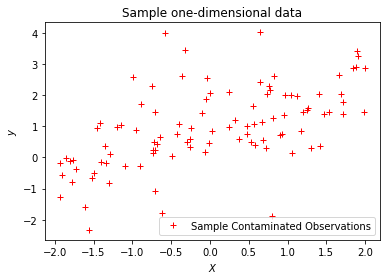

[[0.97558216]
 [0.63378153]]


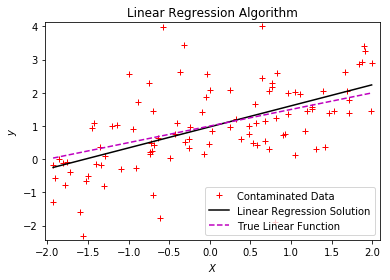

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

def pltLinReg(X, y, W, true_W):
  title = "Linear Regression Algorithm"
    
  f = plt.figure()
  plt.plot(X[:,1],y,'r+',label='Contaminated Data')
  
  w, b = W[1], W[0]
  true_w, true_b = true_W[1], true_W[0]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, w*l+b, 'k-', label='Linear Regression Solution')
  plt.plot(l, true_w*l+true_b, 'm--', label='True Linear Function')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(y)-0.1, max(y)+0.1)
  plt.xlabel("$X$")
  plt.ylabel("$y$")
  plt.legend()
  plt.title(title)
  plt.savefig('ch.4.LinReg.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.4.LinReg.eps', dpi=350, bbox_inches='tight')
  plt.show()


X = np.random.uniform(-2,2,(100,1))
true_w = 0.5
true_b = 1
true_y = true_w*X+true_b

# contaminate data with gaussian noise
y = true_y + np.random.normal(0,1,(100,1))


fig = plt.figure()
plt.plot(X,y,'r+',label='Sample Contaminated Observations')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.title('Sample one-dimensional data')
plt.axis('tight')
plt.savefig('ch.4.reg.data.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.4.reg.data.eps', dpi=350, bbox_inches='tight')
plt.show()

X_train = np.append(np.ones((100,1)), X, 1)   # add a column of ones

#Estimate the pseudo inverse
Xs = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T)

#Calculate w
w = Xs.dot(y)

print(w)

pltLinReg(X_train,y,w,[true_b,true_w]) 



##Measuring Success and Error
###Multiple Classes

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion matrix
[[25  0  0  0]
 [ 0 23  1  1]
 [ 1  0 22  1]
 [ 0  1  1 24]]


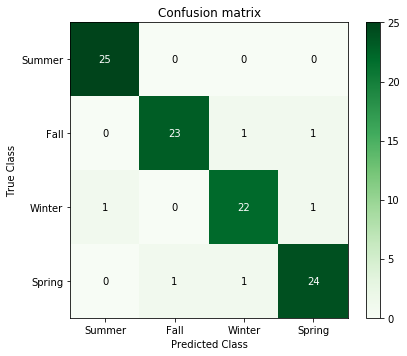

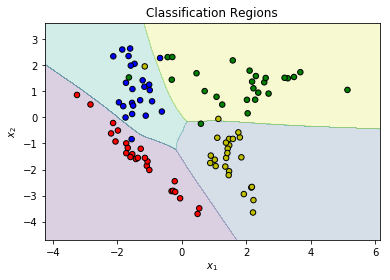

BER:
0.06006410256410266


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


X, y = make_classification(n_samples=100, n_features=2, n_classes=4,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.4, 
                           random_state=7)

class_names = ['Summer','Fall','Winter','Spring']

# Train an MLP 
classifier = MLPClassifier((40,30,20,10))
y_pred = classifier.fit(X, y).predict(X)


title = 'Confusion matrix'
# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

classes = class_names

print(title)
print(cm)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

# Show ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # add class labels
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True Class',
       xlabel='Predicted Class')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
np.set_printoptions(precision=2)
plt.axis('tight')
plt.savefig('ch.4.two-class.confusion.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.4.two-class.confusion.eps', dpi=350, bbox_inches='tight')
plt.show()


# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, ax = plt.subplots()
colors = []
for y_ in y:
  col = 'r' if y_==0 else 'y' if y_==1 else 'b' if y_==2 else 'g'
  colors.append(col)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
  

ax.contourf(xx, yy, Z, alpha=0.2)
ax.scatter(X[:, 0], X[:, 1], c=colors, s=30, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Classification Regions')
plt.axis('tight')
plt.savefig('ch.4.two-class.regions.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.4.two-class.regions.eps', dpi=350, bbox_inches='tight')

plt.show()

# Compute BER
BER = []
for i in range(len(cm)):
  BER.append(cm[i,i]/sum(cm[i,:]))

print('BER:')
print(1 - sum(BER)/len(BER))


In [ ]:
from sklearn.metrics import balanced_accuracy_score
print('BER', 1- balanced_accuracy_score(y, y_pred))

BER 0.06006410256410266


###Regression

(100, 1)
(100, 2)
R_2 score: 0.9475412963742292
MAE: 0.12520789832848903
MSE: 0.01695617450117673


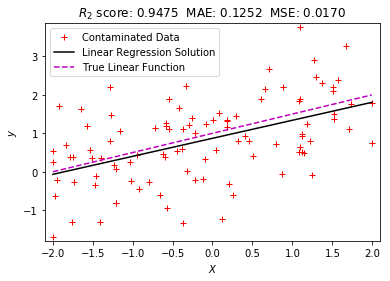

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def pltLinRegMetrics(X, y, W, true_W, r2, mae, mse):
  title = "$R_2$ score: {0:.4f}  MAE: {1:.4f}  MSE: {2:.4f}".format(r2,mae,mse)
    
  f = plt.figure()
  plt.plot(X[:,1],y,'r+',label='Contaminated Data')
  
  w, b = W[1], W[0]
  true_w, true_b = true_W[1], true_W[0]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, w*l+b, 'k-', label='Linear Regression Solution')
  plt.plot(l, true_w*l+true_b, 'm--', label='True Linear Function')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(y)-0.1, max(y)+0.1)
  plt.xlabel("$X$")
  plt.ylabel("$y$")
  plt.legend()
  plt.title(title)
  plt.savefig('ch.4.LinReg.metrics.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.4.LinReg.metrics.eps', dpi=350, bbox_inches='tight')
  plt.show()


X = np.random.uniform(-2,2,(100,1))
true_w = 0.5
true_b = 1
true_y = true_w*X+true_b

# contaminate data with gaussian noise
y = true_y + np.random.normal(0,1,(100,1))

print(X.shape)
X_train = np.append(np.ones((100,1)), X, 1)   # add a column of ones
print(X_train.shape)

#Estimate the pseudo inverse
Xs = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T)

#Calculate w
w = Xs.dot(y)

true_y = true_w*X+true_b
pred_y = w[1]*X+w[0]

r2 = r2_score(true_y,pred_y)
mae = mean_absolute_error(true_y,pred_y)
mse = mean_squared_error(true_y,pred_y)

print('R_2 score:', r2)
print('MAE:', mae)
print('MSE:', mse)

pltLinRegMetrics(X_train,y,w,[true_b,true_w],r2,mae,mse) 



##Identifying Overfitting and Generalization
###No test data? No problem: cross-validate

Fold:  1
Fold:  2
Fold:  3
R_2: 0.935006  Std: 0.054835
MAE: 0.106212  Std: 0.042851
MSE: 0.0184534  Std: 0.014333


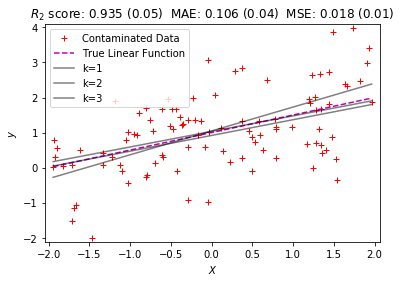

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold



f = plt.figure()

X = np.random.uniform(-2,2,(100,1))
true_w = 0.5
true_b = 1
true_y = true_w*X+true_b

# contaminate data with gaussian noise
y = true_y + np.random.normal(0,1,(100,1))

cv_r2 = []
cv_mae = []
cv_mse = []
kf = KFold(n_splits=3)

plt.plot(X,y,'r+',label='Contaminated Data')
l = np.linspace(min(X),max(X))
plt.plot(l, true_w*l+true_b, 'm--', label='True Linear Function')

k = 0
for train_index, test_index in kf.split(X):
  k += 1
  print("Fold: ", k)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train = np.append(np.ones((len(X_train),1)), X_train, 1)   # add a column of ones
  X_test = np.append(np.ones((len(X_test),1)), X_test, 1)   # add a column of ones
  
  #Estimate the pseudo inverse
  Xs = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T)

  #Calculate w
  w = Xs.dot(y_train)

  true_y = true_w*X[test_index]+true_b
  pred_y = w[1]*X[test_index]+w[0]

  r2 = r2_score(true_y,pred_y)
  mae = mean_absolute_error(true_y,pred_y)
  mse = mean_squared_error(true_y,pred_y)

#   print('R_2 score:', r2)
#   print('MAE:', mae)
#   print('MSE:', mse)
  
  cv_r2.append(r2)
  cv_mae.append(mae)
  cv_mse.append(mse)

  plt.plot(l, w[1]*l+w[0], 'k-', label='k='+str(k), alpha=0.5)

print("R_2: {0:.6}  Std: {1:0.5}".format(np.mean(cv_r2),np.std(cv_r2)))
print("MAE: {0:.6}  Std: {1:0.5}".format(np.mean(cv_mae),np.std(cv_mae)))
print("MSE: {0:.6}  Std: {1:0.5}".format(np.mean(cv_mse),np.std(cv_mse)))


title = "$R_2$ score: {0:.3f} ({1:.2f})  MAE: {2:.3f} ({3:.2f})  MSE: {4:.3f} ({5:.2f})".format(np.mean(cv_r2),
                                                                                                np.std(cv_r2),
                                                                                                np.mean(cv_mae),
                                                                                                np.std(cv_mae),
                                                                                                np.mean(cv_mse),
                                                                                                np.std(cv_mse))
plt.axis('tight')
plt.xlim(min(X)-0.1, max(X)+0.1)
plt.ylim(min(y)-0.1, max(y)+0.1)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
plt.title(title)
plt.savefig('ch.4.LinReg.cv.metrics.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.4.LinReg.cv.metrics.eps', dpi=350, bbox_inches='tight')
plt.show()


##The Art Behind Learning

(8,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.275000  (0.22454)
[[20  4  1  0]
 [ 3 20  2  0]
 [ 2  4 17  1]
 [ 1  3  8 14]]


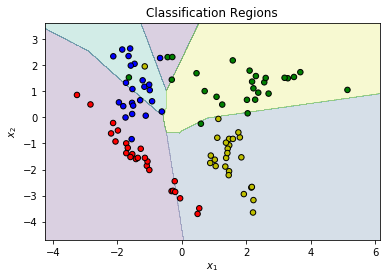

(16, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.104167  (0.09727)
[[21  1  3  0]
 [ 0 23  1  1]
 [ 0  0 23  1]
 [ 1  1  2 22]]


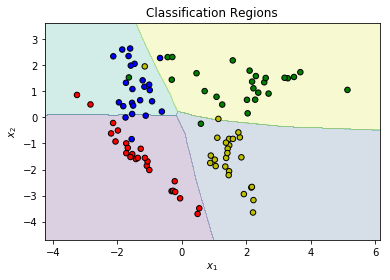

(32, 16, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.100000  (0.07949)
[[23  0  2  0]
 [ 2 21  1  1]
 [ 1  0 22  1]
 [ 0  1  1 24]]


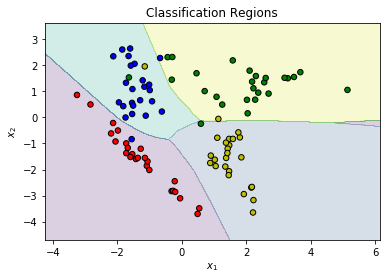

(64, 32, 16, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.095833  (0.09511)
[[23  0  2  0]
 [ 0 24  1  0]
 [ 1  0 22  1]
 [ 0  1  4 21]]


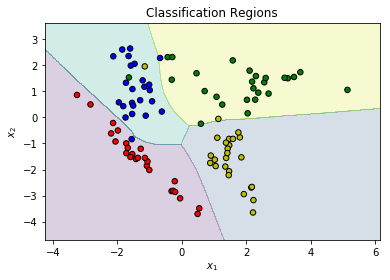

(128, 64, 32, 16, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.066667  (0.04640)
[[25  0  0  0]
 [ 0 23  1  1]
 [ 1  0 22  1]
 [ 0  2  1 23]]


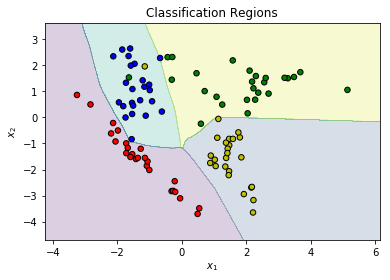

(256, 128, 64, 32, 16, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.079167  (0.04350)
[[25  0  0  0]
 [ 0 23  1  1]
 [ 1  0 21  2]
 [ 0  2  1 23]]


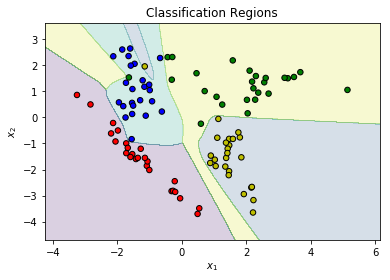

(512, 256, 128, 64, 32, 16, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CV-BER: 0.087500  (0.07558)
[[25  0  0  0]
 [ 0 23  1  1]
 [ 1  1 20  2]
 [ 0  2  1 23]]


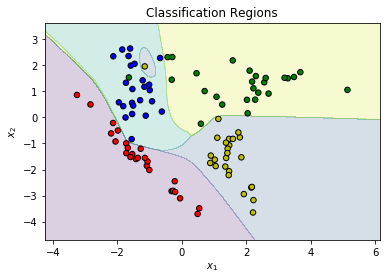

[0.275, 0.1041666666666667, 0.10000000000000002, 0.09583333333333335, 0.06666666666666668, 0.07916666666666669, 0.08750000000000002]
[0.22453655975512465, 0.09727181274940627, 0.07949493345141215, 0.09510593508761107, 0.04639803635691686, 0.043501277120460626, 0.07557648811340441]


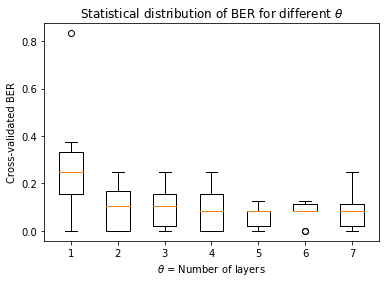

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold



X, y = make_classification(n_samples=100, n_features=2, n_classes=4,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.4, 
                           random_state=7)

class_names = ['Summer','Fall','Winter','Spring']


arcDic = {0: (8,),
          1: (16,8),
          2: (32,16,8),
          3: (64,32,16,8),
          4: (128,64,32,16,8),
          5: (256,128,64,32,16,8),
          6: (512,256,128,64,32,16,8)
         }

arcBERdata = np.empty((10,7))
arcBER = []
arcBERstd = []
for a in range(7):
  print(arcDic[a])
  
  tcm = []
  cv_ber = []

  skf = StratifiedKFold(n_splits=10)
  skf.get_n_splits(X, y)
  k = 0
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train an MLP 
    classifier = MLPClassifier(arcDic[a])
    y_pred = classifier.fit(X_train, y_train).predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    if len(tcm)>0:
      tcm += cm
    else:
      tcm = cm


    # Compute BER
    BER = []
    for i in range(len(cm)):
      BER.append(cm[i,i]/sum(cm[i,:]))

    cv_ber.append(1 - sum(BER)/len(BER))
    arcBERdata[k,a] = 1 - sum(BER)/len(BER)
    k += 1

    
  print('CV-BER: {0:.6f}  ({1:0.5f})'.format(np.mean(cv_ber),np.std(cv_ber)))
  print(tcm)
  
  arcBER.append(np.mean(cv_ber))
  arcBERstd.append(np.std(cv_ber))
  
  # Plotting decision boundaries
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

  f, ax = plt.subplots()
  colors = []
  for y_ in y:
    col = 'r' if y_==0 else 'y' if y_==1 else 'b' if y_==2 else 'g'
    colors.append(col)
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)


  ax.contourf(xx, yy, Z, alpha=0.2)
  ax.scatter(X[:, 0], X[:, 1], c=colors, s=30, edgecolor='k')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.title('Classification Regions')
  plt.axis('tight')
  plt.savefig('ch.4.two-class.regions.cv.'+str(a)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.4.two-class.regions.cv.'+str(a)+'.eps', dpi=350, bbox_inches='tight')

  plt.show()
  
print(arcBER)
print(arcBERstd)

plt.boxplot(arcBERdata, labels=list('1234567'), showfliers=False)
plt.xlabel('$\\theta$ = Number of layers')
plt.ylabel('Cross-validated BER')
plt.title('Statistical distribution of BER for different $\\theta$')
plt.axis('tight')
plt.savefig('ch.4.two-class.boxplot.cv.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.4.two-class.boxplot.cv.eps', dpi=350, bbox_inches='tight')
plt.show()
